In [1]:
import pandas as pd
data = pd.read_csv(r"D:\PyHack-PyAITM-PyHack04-main\PyHack-PyAITM-PyHack04-main\Final Project\Data\PhiUSIIL_Phishing_URL_Dataset.csv")

In [132]:
print(data.dtypes)

FILENAME                       object
URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode  

In [133]:
data = data.drop(['FILENAME','Title'],axis=1)

In [134]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
import hashlib

# Creating label encoders for each column
url_encoder = LabelEncoder()
domain_encoder = LabelEncoder()
tld_encoder = LabelEncoder()

# Fitting the encoders and transforming the data
#data['EncodedURL'] = url_encoder.fit_transform(data['URL'])
data['hashed_' + 'URL'] = data['URL'].apply(lambda x: hashlib.md5(str(x).encode('utf-8')).hexdigest())
#data['EncodedDomain'] = domain_encoder.fit_transform(data['Domain'])
data['hashed_' + 'Domain'] = data['Domain'].apply(lambda x: hashlib.md5(str(x).encode('utf-8')).hexdigest())
data['EncodedTLD'] = tld_encoder.fit_transform(data['TLD'])

import pickle

# Save the encoders and feature names as .pkl files
with open('url_encoder13.pkl', 'wb') as file:
    pickle.dump(url_encoder, file)

with open('domain_encoder13.pkl', 'wb') as file:
    pickle.dump(domain_encoder, file)

with open('tld_encoder13.pkl', 'wb') as file:
    pickle.dump(tld_encoder, file)

#with open('feature_order.pkl', 'wb') as file:
#    pickle.dump(X.columns.tolist(), file)  # Save the feature names


# Optionally drop the original text columns if they are no longer needed
data.drop(['URL', 'Domain', 'TLD'], axis=1, inplace=True)

# Save the new dataset with encoded values
data.to_csv('encoded_dataset13.csv', index=False)

In [123]:
data = pd.read_csv(r"D:\PyHack-PyAITM-PyHack04-main\PyHack-PyAITM-PyHack04-main\Final Project\encoded_dataset13.csv")

print(data.dtypes)

URLLength                       int64
DomainLength                    int64
IsDomainIP                      int64
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineLength               int64
HasTitle                        int64
DomainTitleMatchScore         float64
URLTitleMatc

In [124]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib  # For saving the model for later use
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.linear_model import SGDClassifier

In [ ]:
X = data.drop(['label','EncodedURL','EncodedTLD','EncodedDomain'],axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = SGDClassifier(
    loss='hinge',  # Use 'hinge' for linear SVM, 'log_loss' for logistic regression
    penalty='l2',  # Regularization method: 'l2', 'l1', or 'elasticnet'
    max_iter=1000,  # Maximum iterations
    alpha=0.0001,  # Regularization strength
    random_state=42,  # Ensures reproducibility
    learning_rate='optimal'  # Learning rate schedule
)

model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [129]:
y_pred = model.predict(X_test)
y_pred


array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9896732331050276
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20124
           1       0.99      0.99      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



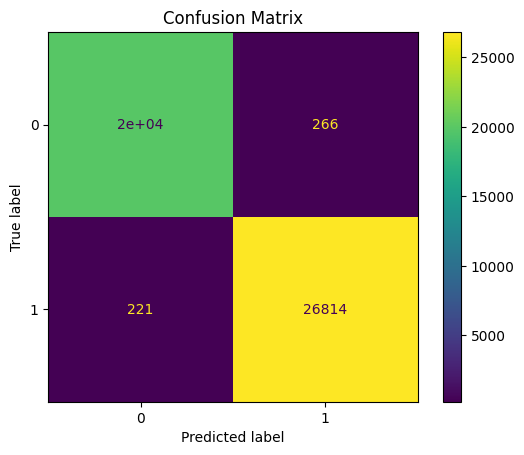

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)

# Calculate and display the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Cross-Validation Scores: [0.98385814 0.9901927  0.9889204  0.98841678 0.98754208]
Mean Accuracy: 0.987786021373857


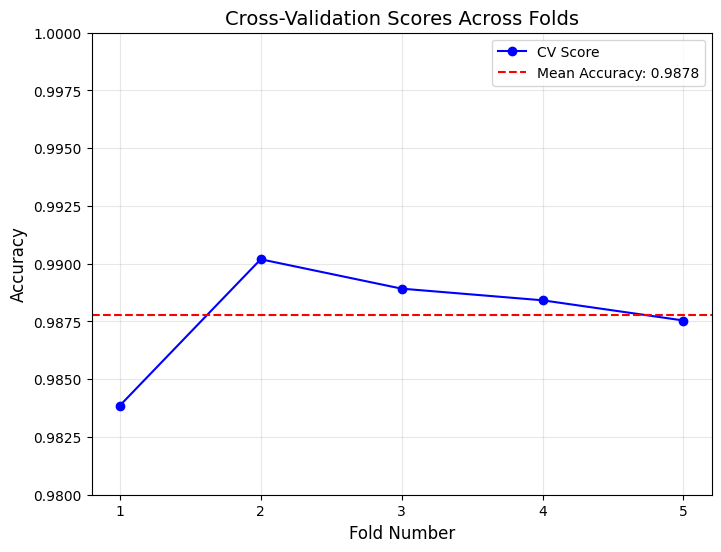

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Cross-validation scores and their indices
cv_scores = [0.98385814, 0.9901927, 0.9889204, 0.98841678, 0.98754208]
folds = np.arange(1, len(cv_scores) + 1)

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(folds, cv_scores, marker='o', linestyle='-', color='b', label='CV Score')

# Adding a horizontal line for the mean accuracy
mean_score = np.mean(cv_scores)
plt.axhline(mean_score, color='r', linestyle='--', label=f'Mean Accuracy: {mean_score:.4f}')

# Customizing the graph
plt.title("Cross-Validation Scores Across Folds", fontsize=14)
plt.xlabel("Fold Number", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(folds)
plt.ylim(0.98, 1.0)
plt.grid(alpha=0.3)
plt.legend(fontsize=10)

# Display the graph
plt.show()


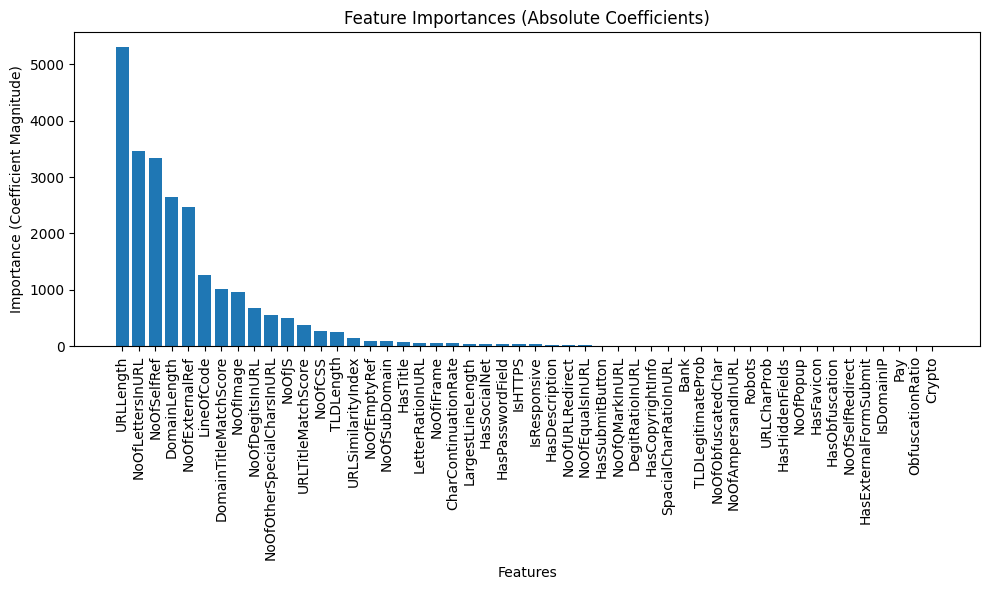

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Get coefficients from the SGD model
coefficients = model.coef_[0]  # Use the first class coefficients
indices = np.argsort(np.abs(coefficients))[::-1]  # Sort by absolute values
features = X_train.columns

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Absolute Coefficients)')
plt.bar(range(len(features)), np.abs(coefficients[indices]), align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance (Coefficient Magnitude)")
plt.tight_layout()
plt.show()



In [54]:
from bs4 import BeautifulSoup
import requests
from urllib.parse import urlparse
import tldextract
import re

def extract_url_features(url):
    # Base Parsing
    parsed_url = urlparse(url)
    extracted = tldextract.extract(url)
    
    # Initialize features
    features = {
        "URLLength": len(url),
        "DomainLength": len(extracted.domain),
        "IsDomainIP": int(re.match(r'^\d{1,3}(\.\d{1,3}){3}$', extracted.domain) is not None),
        "TLDLength": len(extracted.suffix),
        "NoOfSubDomain": extracted.subdomain.count('.') + 1 if extracted.subdomain else 0,
        "IsHTTPS": 1 if parsed_url.scheme == 'https' else 0,
        "NoOfEqualsInURL": url.count('='),
        "NoOfQMarkInURL": url.count('?'),
        "NoOfAmpersandInURL": url.count('&'),
        "NoOfOtherSpecialCharsInURL": sum(not c.isalnum() and not c.isspace() for c in url),
    }
    
    # Attempt to fetch the URL content
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
    except Exception as e:
        # If fetching fails, set default values
        features.update({
            "LineOfCode": 0, "LargestLineLength": 0, "HasTitle": 0, "NoOfImage": 0,
            "NoOfCSS": 0, "NoOfJS": 0, "HasDescription": 0, "HasPasswordField": 0,
            "NoOfPopup": 0, "HasExternalFormSubmit": 0, "HasSocialNet": 0,
        })
        return features

    # HTML Content Analysis
    features["LineOfCode"] = len(response.text.split('\n'))
    features["LargestLineLength"] = max(len(line) for line in response.text.split('\n'))
    features["HasTitle"] = 1 if soup.title else 0
    features["NoOfImage"] = len(soup.find_all('img'))
    features["NoOfCSS"] = len(soup.find_all('link', rel="stylesheet"))
    features["NoOfJS"] = len(soup.find_all('script'))
    features["HasDescription"] = 1 if soup.find("meta", attrs={"name": "description"}) else 0
    features["HasPasswordField"] = 1 if soup.find("input", attrs={"type": "password"}) else 0
    features["NoOfPopup"] = len(soup.find_all("div", attrs={"class": "popup"}))
    features["HasExternalFormSubmit"] = 1 if any(
        form.get("action", "").startswith("http") for form in soup.find_all("form")
    ) else 0
    features["HasSocialNet"] = 1 if any(
        net in str(soup) for net in ["facebook", "twitter", "linkedin"]
    ) else 0

    return features

# Test the function
url = "https://scikit-learn.org/1.3/tutorial/machine_learning_map/"
features = extract_url_features(url)
print(features)


{'URLLength': 59, 'DomainLength': 12, 'IsDomainIP': 0, 'TLDLength': 3, 'NoOfSubDomain': 0, 'IsHTTPS': 1, 'NoOfEqualsInURL': 0, 'NoOfQMarkInURL': 0, 'NoOfAmpersandInURL': 0, 'NoOfOtherSpecialCharsInURL': 12, 'LineOfCode': 327, 'LargestLineLength': 394, 'HasTitle': 1, 'NoOfImage': 2, 'NoOfCSS': 12, 'NoOfJS': 11, 'HasDescription': 1, 'HasPasswordField': 0, 'NoOfPopup': 0, 'HasExternalFormSubmit': 0, 'HasSocialNet': 0}


In [83]:
import numpy as np

# Extract values from the dictionary
data_values = [59, 12, 0, 3, 0, 1, 0, 0, 0, 12, 327, 394, 1, 2, 12, 11, 1, 0, 0, 0, 0]

# Convert to NumPy array and reshape
data_array = np.array(data_values).reshape(1, -1)

-------------------------------------------------------------------------------------------------------------------------------------

In [86]:
import pandas as pd
data = pd.read_csv(r"C:\Users\vishw\Downloads\archive (3)\dataset_phishing.csv")

In [87]:
print(data.dtypes)

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


In [88]:
data = data.drop(['url'],axis=1)

In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib  # For saving the model for later use
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn import svm

In [90]:
X = data.drop(['status'],axis=1)
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [92]:
y_pred = clf.predict(X_test)
y_pred

array(['legitimate', 'phishing', 'phishing', ..., 'phishing', 'phishing',
       'phishing'], dtype=object)

In [93]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5958005249343832
Classification Report:
               precision    recall  f1-score   support

  legitimate       0.74      0.31      0.44      1157
    phishing       0.56      0.88      0.68      1129

    accuracy                           0.60      2286
   macro avg       0.65      0.60      0.56      2286
weighted avg       0.65      0.60      0.56      2286

